In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

path =r"C:\Users\MEGHANA VASIREDDI\Documents\naresh it\dataset\visadataset.csv"
visa_df=pd.read_csv(path)

cat_columns=visa_df.select_dtypes(include="object").columns
num_columns=visa_df.select_dtypes(exclude="object").columns
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**bi variate analysis**

- we already seen uni variate analysis

- we performed the catagorical column analysis

    - frequency table

    - pie chart

    - relative frequency table(value counts normalize form)
 
    - pie chart

- we performed the numerical column analysis

    - histogram

    - distribution plots

    - box plot

    - outliers analysis
 
    - filling the outliers

- now we will do catagorical - categorical analysis

- numerical - numerical analysis

- categorical - numerical analysis

**categorical to categorical**

- lets consider two columns

    - continent

    - case status

In [3]:
# continent
visa_df["continent"].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
visa_df["case_status"].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**task**

- find the certified observations continent wise

- find the denied observations continent wise

In [5]:
con1=visa_df["continent"]=="Asia"
con2=visa_df["case_status"]=="Certified"
con3=con1&con2
len(visa_df[con3])

11012

In [6]:
cont=visa_df["continent"].unique()
visa_df["continent"].value_counts().keys()
for i in cont:
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Certified"
    con3=con1&con2
    count=len(visa_df[con3])
    print(f"the number of certified visa from {i} is {count}")
    

the number of certified visa from Asia is 11012
the number of certified visa from Africa is 397
the number of certified visa from North America is 2037
the number of certified visa from Europe is 2957
the number of certified visa from South America is 493
the number of certified visa from Oceania is 122


In [7]:
cont=visa_df["continent"].unique()
cert_list,den_list=[],[]
for i in cont:
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Certified"
    con3=visa_df["case_status"]=="Denied"
    cert_con=con1&con2
    den_con=con1&con3
    cert_count=len(visa_df[cert_con])
    den_count=len(visa_df[den_con])
    print(f"the number of certified visa from {i} is {cert_count}")
    print(f"the number of denied visa from {i} is {den_count}")
    cert_list.append(cert_count)
    den_list.append(den_count)

the number of certified visa from Asia is 11012
the number of denied visa from Asia is 5849
the number of certified visa from Africa is 397
the number of denied visa from Africa is 154
the number of certified visa from North America is 2037
the number of denied visa from North America is 1255
the number of certified visa from Europe is 2957
the number of denied visa from Europe is 775
the number of certified visa from South America is 493
the number of denied visa from South America is 359
the number of certified visa from Oceania is 122
the number of denied visa from Oceania is 70


In [31]:
cont
cert_list

[11012, 397, 2037, 2957, 493, 122]

In [8]:
df1=pd.DataFrame(zip(cont,cert_list),columns=["continents","certified"])
df1

,continents,certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [9]:
df2=pd.DataFrame(zip(cont,den_list),columns=["continents","Denied"])
df2

,continents,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [10]:
df3=pd.DataFrame(zip(cert_list,den_list),index=cont,columns=["certified","Denied"])
df3

,certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**

- the above data frame we can make by using a method: **cross tab**

- it is avaliable in pandas

- it takes two arguments 

    - index

    - column

- in the above dataframe index column is : **continent**

- in the above dataframe data column is : **case_statust**

In [11]:
pd.crosstab(visa_df["continent"],visa_df["case_status"])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [12]:
index_column=visa_df["continent"]
data_column=visa_df["case_status"]
df4=pd.crosstab(index_column,data_column)
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


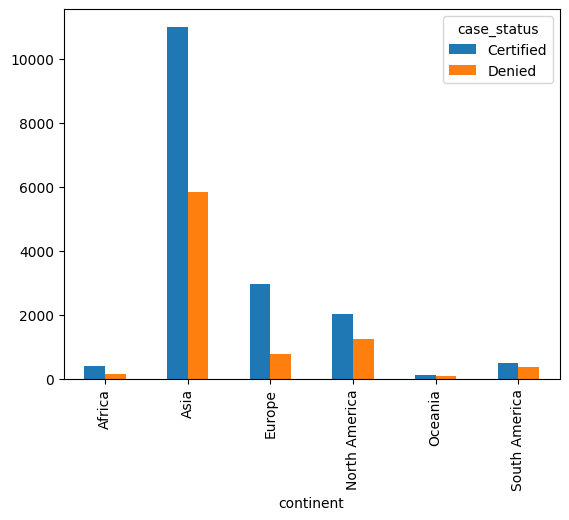

In [13]:
df4.plot(kind="bar")
plt.show()

<Axes: >

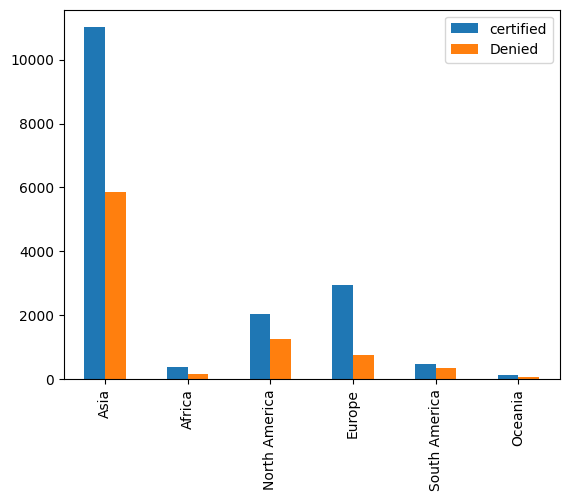

In [14]:
df3.plot(kind="bar")

**multivariate analysis**

  - education

  - continent

  - case status

  - we already know from asia there 11k accepted visa

  - in that i want furthur break down based on education

  - here also pd.crosstab

       - first fix ypur index of any one column out of three column

       -  then keep two column in a list and pass as data column

In [16]:
index_column=visa_df["continent"]
data_column=[visa_df["education_of_employee"],visa_df["case_status"]]
df5=pd.crosstab(index_column,data_column)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

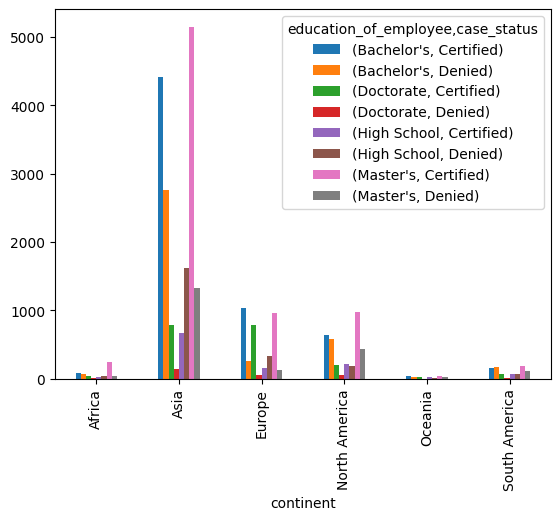

In [17]:
df5.plot(kind="bar")

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

path =r"C:\Users\MEGHANA VASIREDDI\Documents\naresh it\dataset\visadataset.csv"
visa_df=pd.read_csv(path)

cat_columns=visa_df.select_dtypes(include="object").columns
num_columns=visa_df.select_dtypes(exclude="object").columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**numerical vs numerical**

- to understand numerical columns relation we need to plot scatter plots

- scatterplots gives the relation between two numerical columns

- bar chart - pie chart - histrogram - scatter plots

- scatters plot under matplotlib package

- **plt.scatter**

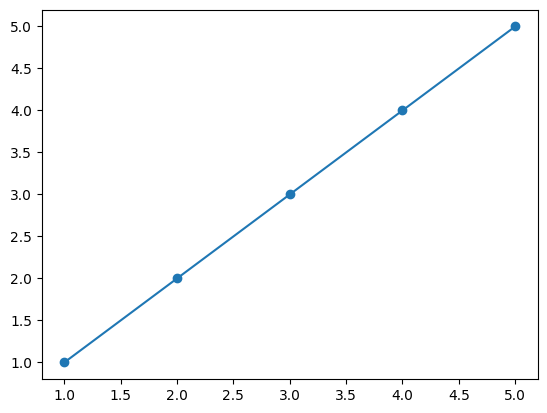

In [20]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

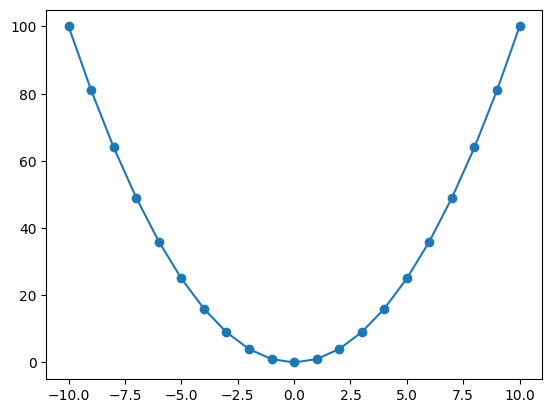

In [21]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [22]:
pd.DataFrame(zip(x,y))

,0,1
0,-10,100
1,-9,81
2,-8,64
3,-7,49
4,-6,36
5,-5,25
6,-4,16
7,-3,9
8,-2,4
9,-1,1


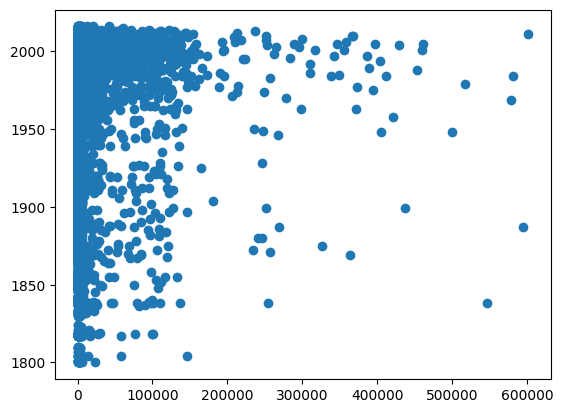

In [23]:
x=visa_df['no_of_employees']
y=visa_df['yr_of_estab']
plt.scatter(x,y)
plt.show()

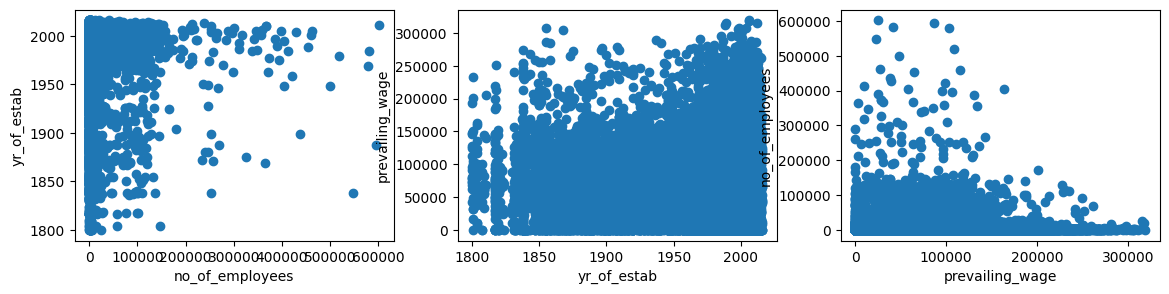

In [24]:
x=visa_df['no_of_employees']
y=visa_df['yr_of_estab']
z=visa_df["prevailing_wage"]
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(x,y)
plt.xlabel("no_of_employees")
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(y,z)
plt.xlabel('yr_of_estab')
plt.ylabel("prevailing_wage")
plt.subplot(1,3,3).scatter(z,x)
plt.xlabel("prevailing_wage")
plt.ylabel("no_of_employees")
plt.show()

- implement the covariance function

- covariance vs correlation

    - covariance will tell about the columns have relation or not

    - covariance will explain about relation status

        - postive relation

        - negative relation

        - no relation

    - correlation tells about how much relation between two variables

    - it denotes with "r"

    - r varies from -1 to 1

    - -1 to 0 indicates negative relation quantity

    - 0 to 1 indicates postive relation quantity

    - 0 indicates no relation

**medhod name : corr**

In [25]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

- Heat map is one of the important visualization method , to show the matrix from of values 

- it is under **seaborn** package

- in every matrix we have heighest values and lowest values available

- heat map will give colour visuliation 

- also it provide color bar , which colour indicates which value 

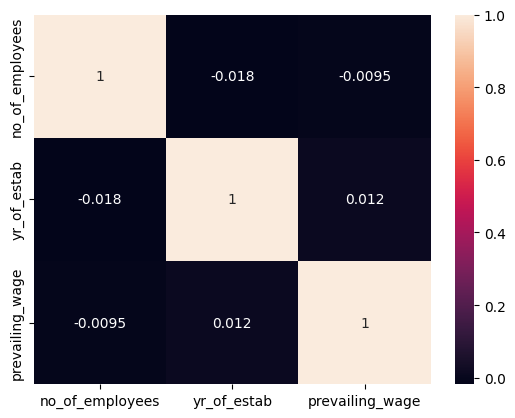

In [26]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

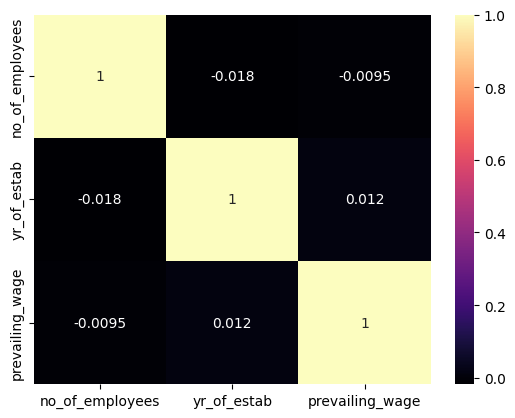

In [27]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap="magma")
plt.show()

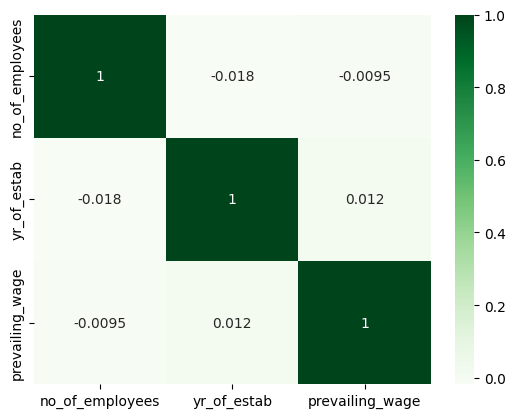

In [28]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap="Greens")
plt.show()

- By seeing the Graphs we might not say the relation status

- it is best practice get the percentage of relation using correlation 

- All 3 columns having approximately zero percentage of relation 

- which indicates all the columns having no relation 

- no relation means independent each other

- in ML we expect the input columns should be independent each other 

- corr method gives matrix view

- we have 3 columns 3*3 total 9 fields

- if a data has 20 columns then 20*20 total 400 fields

- thats why always go with heat map visulaization